<center>
    <h1>
        Image Processing and Computer Vision
    </h1>
    <h2>
        Fruit inspection
    </h2>
</center>

<br>

<b>Student</b>: Matteo Donati <br>
<b>Registration no.</b>: 1032227 <br>
<b>E-mail</b>: matteo.donati10@studio.unibo.it

<br>

<hr>

In [88]:
# Importing cv2.
import cv2

# Importing numpy.
import numpy as np

# Importing pyplot.
from matplotlib import pyplot as plt

# Importing Axes3D.
from mpl_toolkits.mplot3d import Axes3D

# Importing colors.
from matplotlib import colors

# Using TeX to render text.
plt.rc("text", usetex = True)

# Setting the pyplot font family.
plt.rc("font", family = "serif")

# Setting the pyplot font size.
plt.rcParams.update({"font.size": 15})

## First task

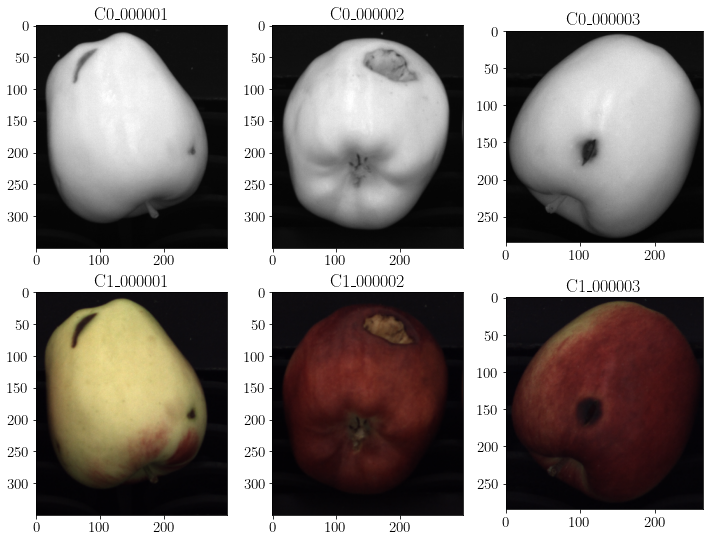

In [112]:
# Defining the filenames of gray-scale images.
gray_scale_filenames = ["C0\_000001", "C0\_000002", "C0\_000003"]

# Defining the filenames of colour images.
colour_filenames = ["C1\_000001", "C1\_000002", "C1\_000003"]

# Computing the number of images.
N_images = len(gray_scale_filenames)

# Defining the list containing gray-scale images.
gray_scale_images = []

# Defining the list containing colour images.
colour_images = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(2, N_images, figsize = (12, 9))

# Reading the gray-scale images.
for i in range(N_images):
    
    # Reading the specific images.
    gray_scale_images.append(cv2.imread("images/first_task/{}.png".format(gray_scale_filenames[i].replace("\\", "")), cv2.IMREAD_GRAYSCALE))
    
    # Reading the specific images.
    colour_images.append(cv2.imread("images/first_task/{}.png".format(colour_filenames[i].replace("\\", ""))))
    
    # Converting the red image into RGB.
    colour_images[i] = cv2.cvtColor(colour_images[i], cv2.COLOR_BGR2RGB)
    
    # Adding the specific titles.
    ax[0, i].set_title(gray_scale_filenames[i])
    ax[1, i].set_title(colour_filenames[i])
    
    # Adding the specific image to the figure.
    ax[0, i].imshow(gray_scale_images[i], cmap = "gray", vmin = 0, vmax = 255)
    ax[1, i].imshow(colour_images[i])

# Showing the figure.
plt.show()

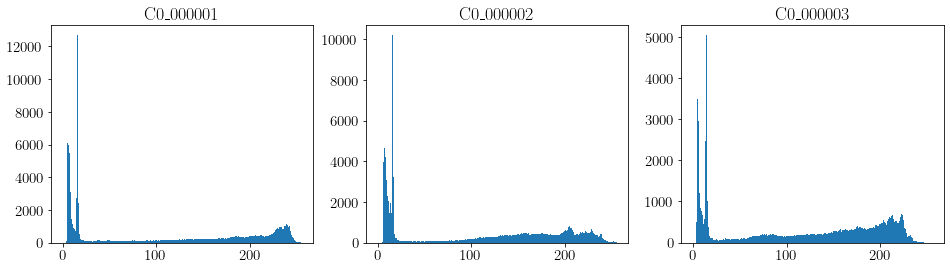

In [92]:
# List of the filtered gray-scale images.
f_gray_scale_images = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (16, 4))

# Filtering the images.
for i in range(N_images):
    
    # Appending the filtered image.
    f_gray_scale_images.append(cv2.GaussianBlur(gray_scale_images[i], (5, 5), 0))
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Adding the histogram of the smoothed image to the figure.
    ax[i].hist(f_gray_scale_images[i].flatten(), bins = range(256))

# Showing the figure.
plt.show()

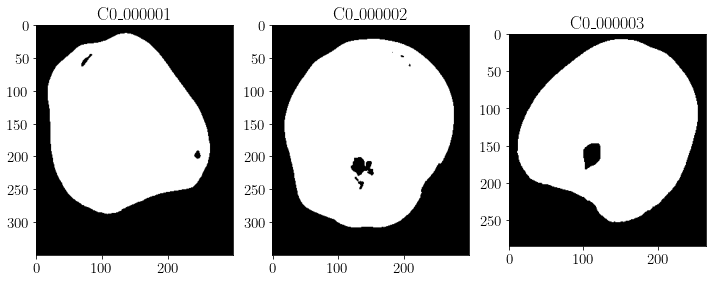

In [93]:
# List of masks.
threshold_masks = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (12, 5))

# Thesholding the gray-scale images.
for i in range(N_images):
    
    # Applying Otsu's thresholding (https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html).
    threshold_value, binary_mask = cv2.threshold(f_gray_scale_images[i], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Appending the generated binary mask.
    threshold_masks.append(binary_mask)
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Plotting the computed binary mask.
    ax[i].imshow(threshold_masks[i], cmap = "gray")

# Showing the figure.
plt.show()

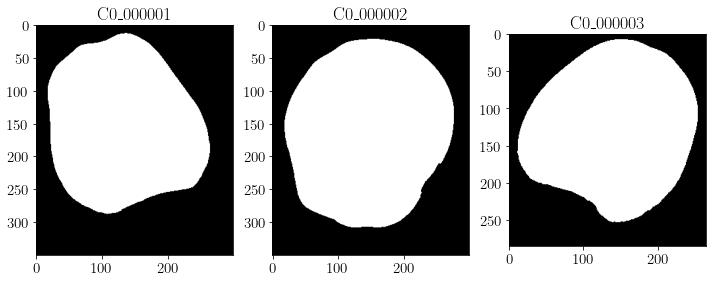

In [94]:
# List of masks.
fruit_masks = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (12, 5))

# Filling the holes of the already computed masks (https://learnopencv.com/filling-holes-in-an-image-using-opencv-python-c/).
for i in range(N_images):
    
    # Copying masks[i].
    mask_copy = threshold_masks[i].copy()
    
    # Filling the holes inside the mask.
    cv2.floodFill(mask_copy, None, (0,0), 255)
    
    # Inverting the flood-filled image.
    inv = cv2.bitwise_not(mask_copy)
    
    # Adding the final mask by or-ing masks[i] and inv.
    fruit_masks.append(threshold_masks[i] | inv)
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Plotting the computed binary mask.
    ax[i].imshow(fruit_masks[i], cmap = "gray")

# Showing the figure.
plt.show()

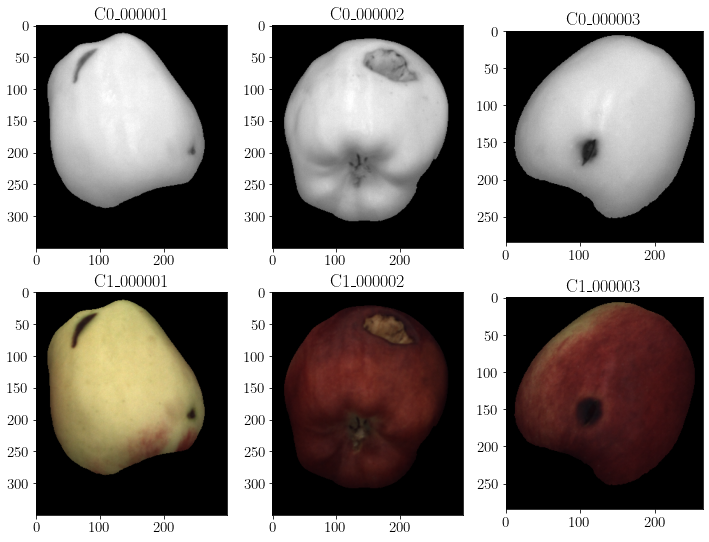

In [95]:
# List of masked gray-scale images.
m_gray_scale_images = []

# List of masked colour images.
m_colour_images = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(2, N_images, figsize = (12, 9))

# Applying the computed final masks to the original images.
for i in range(N_images):
    
    # Applying the computed mask to the specific gray-scale image.
    m_gray_scale_images.append(gray_scale_images[i] & fruit_masks[i])
    
    # Applying the computed mask to the specific colour image.
    m_colour_images.append(colour_images[i] & cv2.cvtColor(fruit_masks[i], cv2.COLOR_GRAY2BGR))
    
    # Adding the specific titles.
    ax[0, i].set_title(gray_scale_filenames[i])
    ax[1, i].set_title(colour_filenames[i])
    
    # Adding the specific image to the figure.
    ax[0, i].imshow(m_gray_scale_images[i], cmap = "gray", vmin = 0, vmax = 255)
    ax[1, i].imshow(m_colour_images[i])

# Showing the figure.
plt.show()

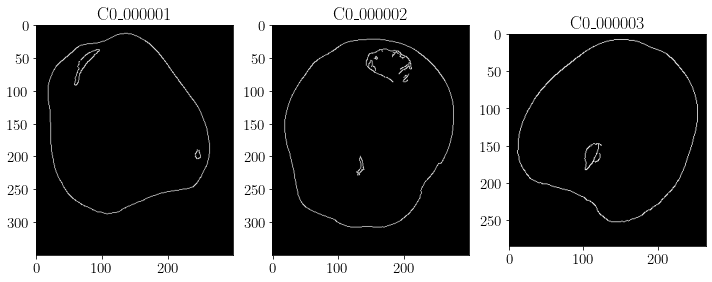

In [96]:
# List of masks.
edges = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (12, 5))

# Applying Canny Edge Detector to every segmented image.
for i in range(N_images):
    
    # Applying Canny Edge Detector to the specific image. In particular, the thresholds (75, 200) are used.
    edges.append(cv2.Canny(m_gray_scale_images[i], 75, 200))
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Plotting the computed binary mask.
    ax[i].imshow(edges[i], cmap = "gray")
    
# Showing the plot.
plt.show()

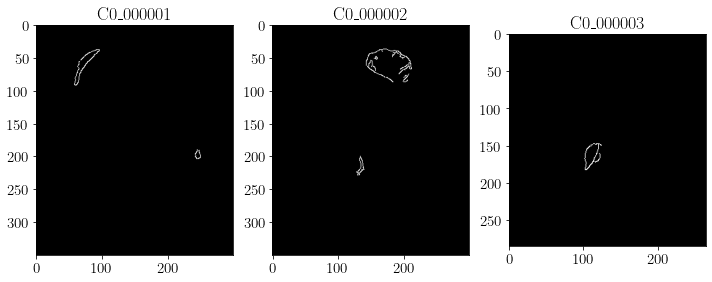

In [97]:
# List of masks.
fruit_defects = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (12, 5))

# Applying erosion in order to preserve only fruit damages.
for i in range(N_images):
    
    # Computing the eroded mask.
    eroded_mask = cv2.erode(fruit_masks[i], cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations = 1)
    
    # Updating edges[i].
    fruit_defects.append(edges[i] * eroded_mask)
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Plotting the computed binary mask.
    ax[i].imshow(fruit_defects[i], cmap = "gray")
    
# Showing the plot.
plt.show()

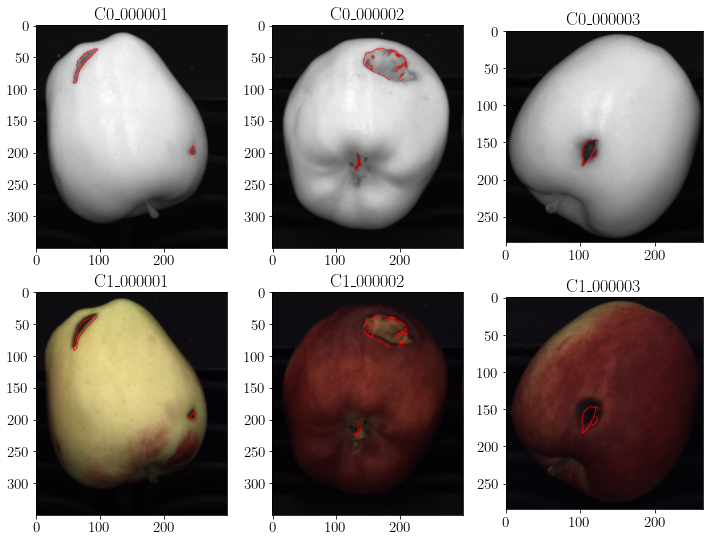

In [98]:
# Defining the figure object to be displayed.
fig, ax = plt.subplots(2, N_images, figsize = (12, 9))

# Applying the computed edges masks to the original images.
for i in range(N_images):
    
    # Converting the specific gray-scale image to RGB.
    img_g = cv2.cvtColor(gray_scale_images[i], cv2.COLOR_GRAY2BGR)
    
    # Copying the specific colour image.
    img_c = colour_images[i].copy()
    
    # Traversing the image.
    for y in range(img_g.shape[0]):
        for x in range(img_g.shape[1]):
            
            # Checking the value of the fruit_defects[i] mask.
            if(fruit_defects[i][y][x]):
                
                # Colouring the temporary RGB img.
                img_g[y][x][0] = 255
                img_g[y][x][1] = 0
                img_g[y][x][2] = 0
                
                # Colouring the temporary RGB img.
                img_c[y][x][0] = 255
                img_c[y][x][1] = 0
                img_c[y][x][2] = 0
    
    # Adding the specific titles.
    ax[0, i].set_title(gray_scale_filenames[i])
    ax[1, i].set_title(colour_filenames[i])
    
    # Adding the specific image to the figure.
    ax[0, i].imshow(img_g)
    ax[1, i].imshow(img_c)

# Showing the figure.
plt.show()

## Second task

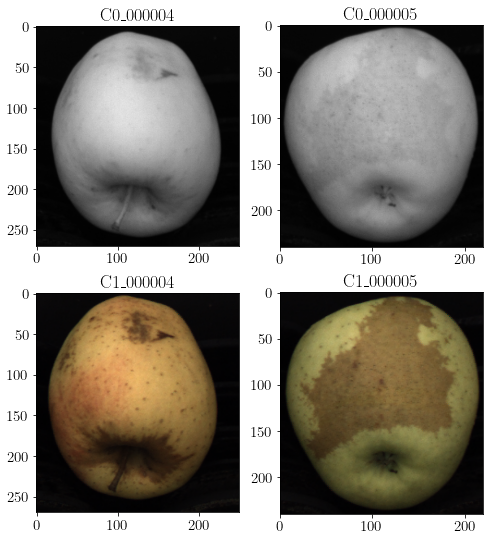

In [111]:
# Defining the filenames of gray-scale images.
gray_scale_filenames = ["C0\_000004", "C0\_000005"]

# Defining the filenames of colour images.
colour_filenames = ["C1\_000004", "C1\_000005"]

# Computing the number of images.
N_images = len(gray_scale_filenames)

# Defining the list containing gray-scale images.
gray_scale_images = []

# Defining the list containing colour images.
colour_images = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(2, N_images, figsize = (8, 9))

# Reading the gray-scale images.
for i in range(N_images):
    
    # Reading the specific images.
    gray_scale_images.append(cv2.imread("images/second_task/{}.png".format(gray_scale_filenames[i].replace("\\", "")), cv2.IMREAD_GRAYSCALE))
    
    # Reading the specific images.
    colour_images.append(cv2.imread("images/second_task/{}.png".format(colour_filenames[i].replace("\\", ""))))
    
    # Converting the red image into RGB.
    colour_images[i] = cv2.cvtColor(colour_images[i], cv2.COLOR_BGR2RGB)
    
    # Adding the specific titles.
    ax[0, i].set_title(gray_scale_filenames[i])
    ax[1, i].set_title(colour_filenames[i])
    
    # Adding the specific image to the figure.
    ax[0, i].imshow(gray_scale_images[i], cmap = "gray", vmin = 0, vmax = 255)
    ax[1, i].imshow(colour_images[i])

# Showing the figure.
plt.show()

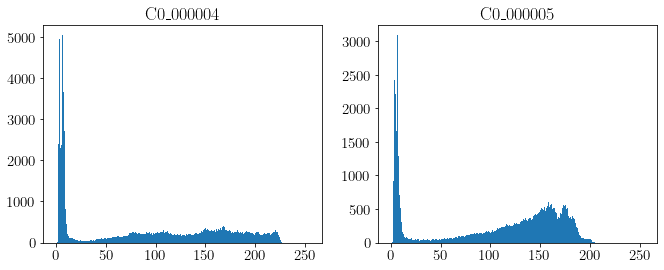

In [101]:
# List of the filtered gray-scale images.
f_gray_scale_images = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (11, 4))

# Filtering the images.
for i in range(N_images):
    
    # Appending the filtered image.
    f_gray_scale_images.append(cv2.GaussianBlur(gray_scale_images[i], (5, 5), 0))
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Adding the histogram of the smoothed image to the figure.
    ax[i].hist(f_gray_scale_images[i].flatten(), bins = range(256))

# Showing the figure.
plt.show()

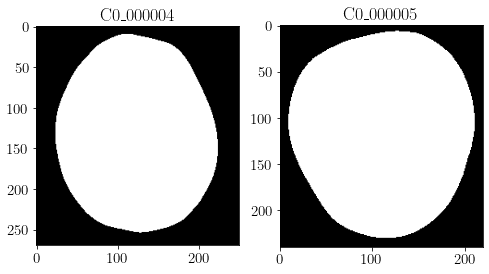

In [102]:
# List of masks.
fruit_masks = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (8, 5))

# Thesholding the gray-scale images.
for i in range(N_images):
    
    # Applying Otsu's thresholding (https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html).
    threshold_value, binary_mask = cv2.threshold(f_gray_scale_images[i], 25, 255, cv2.THRESH_BINARY)
    
    # Definition of an erosion kernel.
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
    
    # Erosion of the binary mask.
    binary_mask = cv2.erode(binary_mask, kernel, iterations = 1)
    
    # Appending the generated binary mask.
    fruit_masks.append(binary_mask)
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Plotting the computed binary mask.
    ax[i].imshow(fruit_masks[i], cmap = "gray")

# Showing the figure.
plt.show()

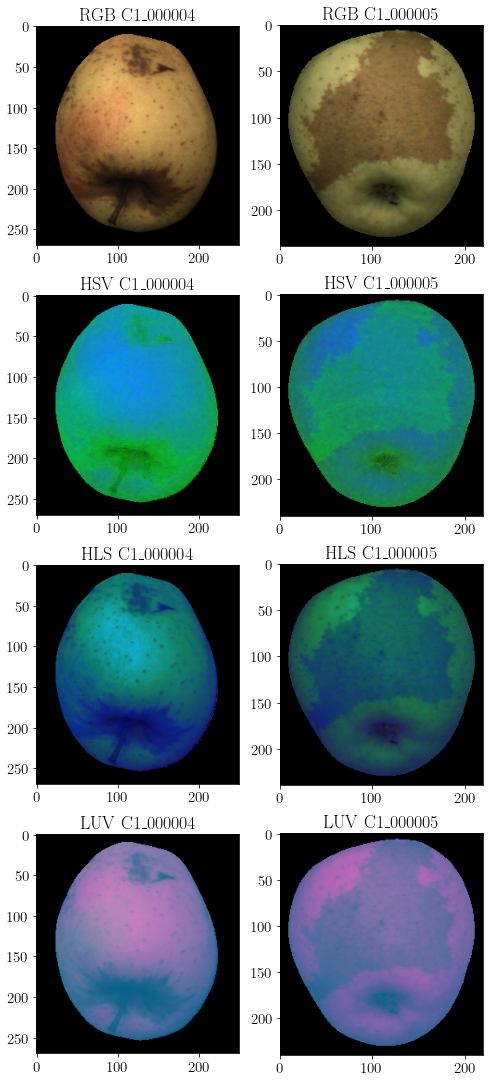

In [103]:
# List of masked images.
m_RGB_images = []
m_HSV_images = []
m_HLS_images = []
m_LUV_images = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(4, N_images, figsize = (8, 19))

# Iterating over images.
for i in range(N_images):
    
    # Applying the computed mask to the specific colour image.
    m_RGB_images.append(colour_images[i] & cv2.cvtColor(fruit_masks[i], cv2.COLOR_GRAY2BGR))
    m_HSV_images.append(cv2.cvtColor(colour_images[i], cv2.COLOR_RGB2HSV) & cv2.cvtColor(fruit_masks[i], cv2.COLOR_GRAY2BGR))
    m_HLS_images.append(cv2.cvtColor(colour_images[i], cv2.COLOR_RGB2HLS) & cv2.cvtColor(fruit_masks[i], cv2.COLOR_GRAY2BGR))
    m_LUV_images.append(cv2.cvtColor(colour_images[i], cv2.COLOR_RGB2LUV) & cv2.cvtColor(fruit_masks[i], cv2.COLOR_GRAY2BGR))
    
    # Adding the specific titles.
    ax[0, i].set_title("RGB " + colour_filenames[i])
    ax[1, i].set_title("HSV " + colour_filenames[i])
    ax[2, i].set_title("HLS " + colour_filenames[i])
    ax[3, i].set_title("LUV " + colour_filenames[i])
    
    # Plotting the computed images.
    ax[0, i].imshow(m_RGB_images[i])
    ax[1, i].imshow(m_HSV_images[i])
    ax[2, i].imshow(m_HLS_images[i])
    ax[3, i].imshow(m_LUV_images[i])

# Showing the figure.
plt.show()

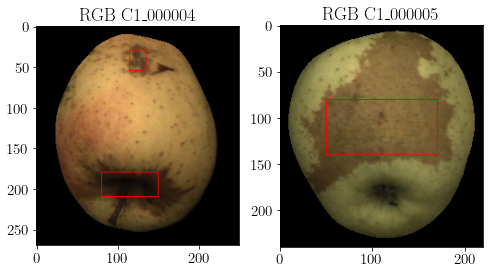

In [104]:
# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (8, 5))

# Start points of rectangles.
start_point_1 = [115, 30]
start_point_2 = [80, 180]
start_point_3 = [50, 80]

# End points of rectangles.
end_point_1 = [135, 55]
end_point_2 = [150, 210]
end_point_3 = [170, 140]

# Creating copies of the images.
RGB_copy_0 = np.copy(m_RGB_images[0])
RGB_copy_1 = np.copy(m_RGB_images[1])

# Selecting russet region.
RGB_copy_0 = cv2.rectangle(RGB_copy_0, start_point_1, end_point_1, [255, 0, 0], 1)
RGB_copy_0 = cv2.rectangle(RGB_copy_0, start_point_2, end_point_2, [255, 0, 0], 1)
RGB_copy_1 = cv2.rectangle(RGB_copy_1, start_point_3, end_point_3, [255, 0, 0], 1)

# Adding the specific titles.
ax[0].set_title("RGB " + colour_filenames[0])
ax[1].set_title("RGB " + colour_filenames[1])

# Plotting the images.
ax[0].imshow(RGB_copy_0)
ax[1].imshow(RGB_copy_1)
    
# Showing the figure.
plt.show()

In [105]:
# List of mean values.
mean_RGB_values = []
mean_HSV_values = []
mean_HLS_values = []
mean_LUV_values = []

# Computing the mean values on RGB images.
mean_RGB_values.append(
    np.vstack(
        (np.mean(m_RGB_images[0][start_point_1[0]:end_point_1[0], start_point_1[1]:end_point_1[1]], axis = (0, 1)),
         np.mean(m_RGB_images[0][start_point_2[0]:end_point_2[0], start_point_2[1]:end_point_2[1]], axis = (0, 1)),
         np.mean(m_RGB_images[1][start_point_3[0]:end_point_3[0], start_point_3[1]:end_point_3[1]], axis = (0, 1)))))

# Computing the mean values on HSV images.
mean_HSV_values.append(
    np.vstack(
        (np.mean(m_HSV_images[0][start_point_1[0]:end_point_1[0], start_point_1[1]:end_point_1[1]], axis = (0, 1)),
         np.mean(m_HSV_images[0][start_point_2[0]:end_point_2[0], start_point_2[1]:end_point_2[1]], axis = (0, 1)),
         np.mean(m_HSV_images[1][start_point_3[0]:end_point_3[0], start_point_3[1]:end_point_3[1]], axis = (0, 1)))))

# Computing the mean values on HLS images.
mean_HLS_values.append(
    np.vstack(
        (np.mean(m_HLS_images[0][start_point_1[0]:end_point_1[0], start_point_1[1]:end_point_1[1]], axis = (0, 1)),
         np.mean(m_HLS_images[0][start_point_2[0]:end_point_2[0], start_point_2[1]:end_point_2[1]], axis = (0, 1)),
         np.mean(m_HLS_images[1][start_point_3[0]:end_point_3[0], start_point_3[1]:end_point_3[1]], axis = (0, 1)))))

# Computing the mean values on LUV images.
mean_LUV_values.append(
    np.vstack(
        (np.mean(m_LUV_images[0][start_point_1[0]:end_point_1[0], start_point_1[1]:end_point_1[1]], axis = (0, 1)),
         np.mean(m_LUV_images[0][start_point_2[0]:end_point_2[0], start_point_2[1]:end_point_2[1]], axis = (0, 1)),
         np.mean(m_LUV_images[1][start_point_3[0]:end_point_3[0], start_point_3[1]:end_point_3[1]], axis = (0, 1)))))

# Computing the mean of mean_values on axis one.    
ref_RGB = np.mean(mean_RGB_values, axis = 1)[0]
ref_HSV = np.mean(mean_HSV_values, axis = 1)[0]
ref_HLS = np.mean(mean_HLS_values, axis = 1)[0]
ref_LUV = np.mean(mean_LUV_values, axis = 1)[0]

In [106]:
# Defining the list containing the inverse of the covariance matrices.
inv_covs_RGB = []
inv_covs_HSV = []
inv_covs_HLS = []
inv_covs_LUV = []

# Defining the list containing the Mahalanobis distances.
distances_RGB = []
distances_HSV = []
distances_HLS = []
distances_LUV = []

# Shapes list.
shapes = []

# Computing the inverse of the covariance matrix of the two HSV images.
for i in range(N_images):
    
    # Computing the shapes of the original images.
    shapes.append(colour_images[i].shape)
    
    # Flattening the images.
    m_RGB_images[i] = m_RGB_images[i].reshape((shapes[i][0] * shapes[i][1], shapes[i][2]))
    m_HSV_images[i] = m_HSV_images[i].reshape((shapes[i][0] * shapes[i][1], shapes[i][2]))
    m_HLS_images[i] = m_HLS_images[i].reshape((shapes[i][0] * shapes[i][1], shapes[i][2]))
    m_LUV_images[i] = m_LUV_images[i].reshape((shapes[i][0] * shapes[i][1], shapes[i][2]))
    
    # Computing the inverse of the covariance matrix for the specific image.
    inv_covs_RGB.append(np.linalg.inv(np.cov(m_RGB_images[i].T)))
    inv_covs_HSV.append(np.linalg.inv(np.cov(m_HSV_images[i].T)))
    inv_covs_HLS.append(np.linalg.inv(np.cov(m_HLS_images[i].T)))
    inv_covs_LUV.append(np.linalg.inv(np.cov(m_LUV_images[i].T)))
    
    # Distance lists.
    distance_RGB = []
    distance_HSV = []
    distance_HLS = []
    distance_LUV = []
    
    # Iterating over the rows of the specific image.
    for j in range(shapes[i][0] * shapes[i][1]):
        
        # Appending the Mahalanobis value to the specific distance list.
        distance_RGB.append(np.sqrt(np.dot(np.dot((m_RGB_images[i][j] - ref_RGB).T, inv_covs_RGB[i]), (m_RGB_images[i][j] - ref_RGB))))
        distance_HSV.append(np.sqrt(np.dot(np.dot((m_HSV_images[i][j] - ref_HSV).T, inv_covs_HSV[i]), (m_HSV_images[i][j] - ref_HSV))))
        distance_HLS.append(np.sqrt(np.dot(np.dot((m_HLS_images[i][j] - ref_HLS).T, inv_covs_HLS[i]), (m_HLS_images[i][j] - ref_HLS))))
        distance_LUV.append(np.sqrt(np.dot(np.dot((m_LUV_images[i][j] - ref_LUV).T, inv_covs_LUV[i]), (m_LUV_images[i][j] - ref_LUV))))
    
    # Appending the computed distance list to the distances list.
    distances_RGB.append(distance_RGB)
    distances_HSV.append(distance_HSV)
    distances_HLS.append(distance_HLS)
    distances_LUV.append(distance_LUV)

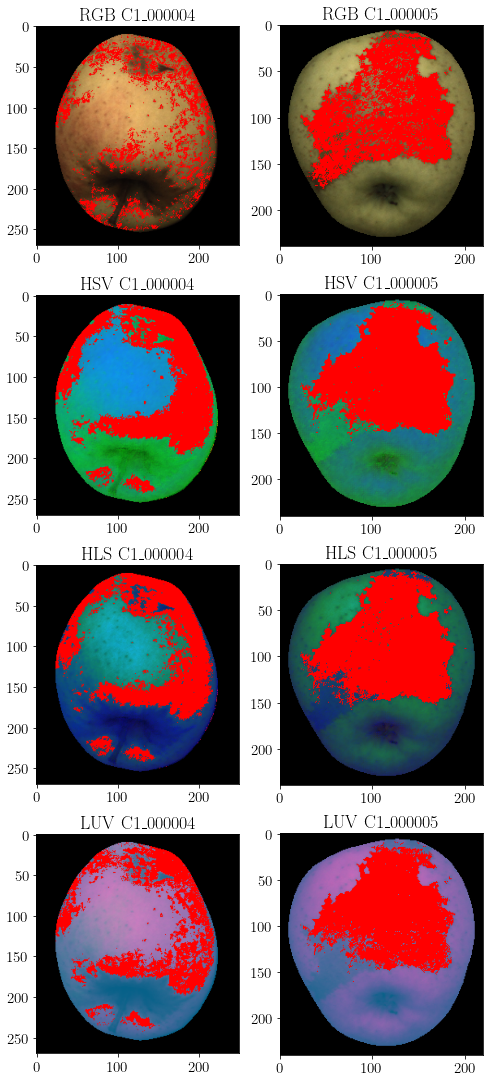

In [108]:
# Defining the figure object to be displayed.
fig, ax = plt.subplots(4, N_images, figsize = (8, 19))

# Iterating over images.
for i in range(N_images):
    
    # Computing the mean of distances.
    mean_RGB = np.mean(distances_RGB[i])
    mean_HSV = np.mean(distances_HSV[i])
    mean_HLS = np.mean(distances_HLS[i])
    mean_LUV = np.mean(distances_LUV[i])
    
    # Reshaping the images.
    m_RGB_images[i] = m_RGB_images[i].reshape((shapes[i][0], shapes[i][1], shapes[i][2]))
    m_HSV_images[i] = m_HSV_images[i].reshape((shapes[i][0], shapes[i][1], shapes[i][2]))
    m_HLS_images[i] = m_HLS_images[i].reshape((shapes[i][0], shapes[i][1], shapes[i][2]))
    m_LUV_images[i] = m_LUV_images[i].reshape((shapes[i][0], shapes[i][1], shapes[i][2]))
    
    # Creating copies of the images.
    RGB_copy = np.copy(m_RGB_images[i])
    HSV_copy = np.copy(m_HSV_images[i])
    HLS_copy = np.copy(m_HLS_images[i])
    LUV_copy = np.copy(m_LUV_images[i])
    
    # Reshaping the computed distances.
    distances_RGB[i] = np.array(distances_RGB[i]).reshape((shapes[i][0], shapes[i][1]))
    distances_HSV[i] = np.array(distances_HSV[i]).reshape((shapes[i][0], shapes[i][1]))
    distances_HLS[i] = np.array(distances_HLS[i]).reshape((shapes[i][0], shapes[i][1]))
    distances_LUV[i] = np.array(distances_LUV[i]).reshape((shapes[i][0], shapes[i][1]))

    # Iterating over the rows of the image.
    for j in range(shapes[i][0]):
        
        # Iterating over the columns of the image.
        for k in range(shapes[i][1]):
            
            # Checking if fruit_masks[i] == 255.
            if fruit_masks[i][j, k] == 255:
                
                # Checking if the distance is lower than mean_X / 1.5.
                if distances_RGB[i][j][k] <= mean_RGB / 1.5: 
                    RGB_copy[j, k, :] = [255, 0, 0]

                if distances_HSV[i][j][k] <= mean_HSV / 1.5: 
                    HSV_copy[j, k, :] = [255, 0, 0]

                if distances_HLS[i][j][k] <= mean_HLS / 1.5: 
                    HLS_copy[j, k, :] = [255, 0, 0]

                if distances_LUV[i][j][k] <= mean_LUV / 1.5: 
                    LUV_copy[j, k, :] = [255, 0, 0]
                
    # Adding the specific titles.
    ax[0, i].set_title("RGB " + colour_filenames[i])
    ax[1, i].set_title("HSV " + colour_filenames[i])
    ax[2, i].set_title("HLS " + colour_filenames[i])
    ax[3, i].set_title("LUV " + colour_filenames[i])
    
    # Plotting the computed images.
    ax[0, i].imshow(RGB_copy)
    ax[1, i].imshow(HSV_copy)
    ax[2, i].imshow(HLS_copy)
    ax[3, i].imshow(LUV_copy)
    
# Showing the figure.
plt.show()

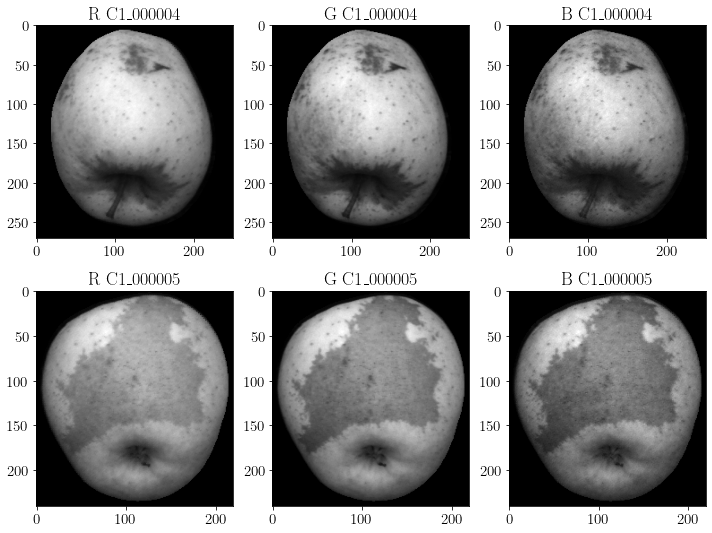

In [84]:
# List of channels' names.
channels_names = ["R", "G", "B"]

# Defining the figure object to be displayed.
fig, ax = plt.subplots(N_images, len(channels_names), figsize = (12, 9))

# Iterating over channels.
for i in range(len(channels_names)):
    
    # Adding the specific titles.
    ax[0, i].set_title(channels_names[i] + " " + colour_filenames[0])
    ax[1, i].set_title(channels_names[i] + " " + colour_filenames[1])
    
    # Adding the specific image to the figure.
    ax[0, i].imshow(m_RGB_images[0][:, :, i], cmap = "gray")
    ax[1, i].imshow(m_RGB_images[1][:, :, i], cmap = "gray")

# Showing the figure.
plt.show()

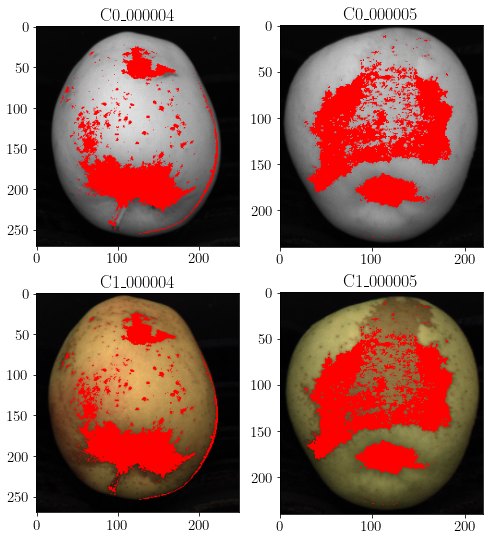

In [109]:
# Best channels is B for both images.
best_channel_index = 2

# Defining the figure object to be displayed.
fig, ax = plt.subplots(2, N_images, figsize = (8, 9))

# Iterating over images.
for i in range(N_images):
    
    # Converting the specific gray-scale image to RGB.
    img_g = cv2.cvtColor(gray_scale_images[i], cv2.COLOR_GRAY2BGR)
    
    # Copying the specific colour image.
    img_c = colour_images[i].copy()
    
    # Applying adaptive thresholding.
    binary_mask = cv2.adaptiveThreshold(m_RGB_images[i][:, :, best_channel_index], 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 75, 0)
    
    # Iterating over the rows of the image.
    for j in range(img_g.shape[0]):
        
        # Iterating over the columns of the image.
        for k in range(img_g.shape[1]):
            
            # Checking if the distance is lower than mean_X / 1.5.
            if fruit_masks[i][j, k] == 255 and binary_mask[j, k] == 255: 
                img_g[j, k, :] = [255, 0, 0]
                img_c[j, k, :] = [255, 0, 0]
    
    # Adding the specific titles.
    ax[0, i].set_title(gray_scale_filenames[i])
    ax[1, i].set_title(colour_filenames[i])
    
    # Adding the specific image to the figure.
    ax[0, i].imshow(img_g)
    ax[1, i].imshow(img_c)

# Showing the figure.
plt.show()

## Final challenge

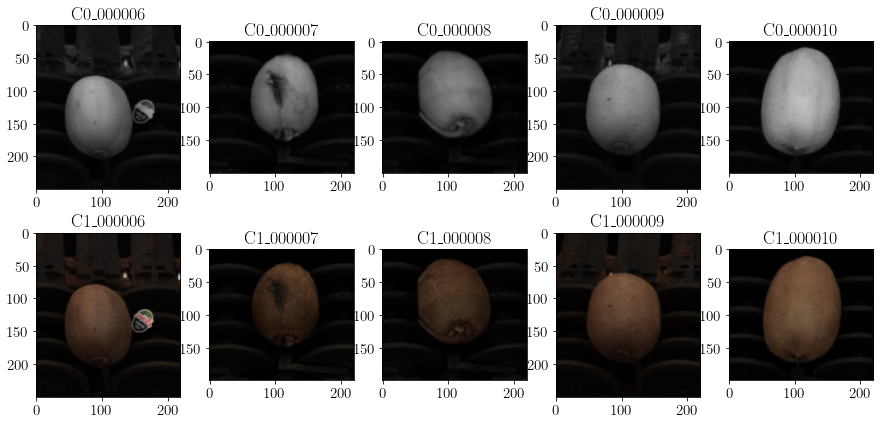

In [114]:
# Defining the filenames of gray-scale images.
gray_scale_filenames = ["C0\_000006", "C0\_000007", "C0\_000008", "C0\_000009", "C0\_000010"]

# Defining the filenames of colour images.
colour_filenames = ["C1\_000006", "C1\_000007", "C1\_000008", "C1\_000009", "C1\_000010"]

# Computing the number of images.
N_images = len(gray_scale_filenames)

# Defining the list containing gray-scale images.
gray_scale_images = []

# Defining the list containing colour images.
colour_images = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(2, N_images, figsize = (15, 7))

# Reading the gray-scale images.
for i in range(N_images):
    
    # Reading the specific images.
    gray_scale_images.append(cv2.imread("images/final_challenge/{}.png".format(gray_scale_filenames[i].replace("\\", "")), cv2.IMREAD_GRAYSCALE))
    
    # Reading the specific images.
    colour_images.append(cv2.imread("images/final_challenge/{}.png".format(colour_filenames[i].replace("\\", ""))))
    
    # Converting the red image into RGB.
    colour_images[i] = cv2.cvtColor(colour_images[i], cv2.COLOR_BGR2RGB)
    
    # Adding the specific titles.
    ax[0, i].set_title(gray_scale_filenames[i])
    ax[1, i].set_title(colour_filenames[i])
    
    # Adding the specific image to the figure.
    ax[0, i].imshow(gray_scale_images[i], cmap = "gray", vmin = 0, vmax = 255)
    ax[1, i].imshow(colour_images[i])

# Showing the figure.
plt.show()

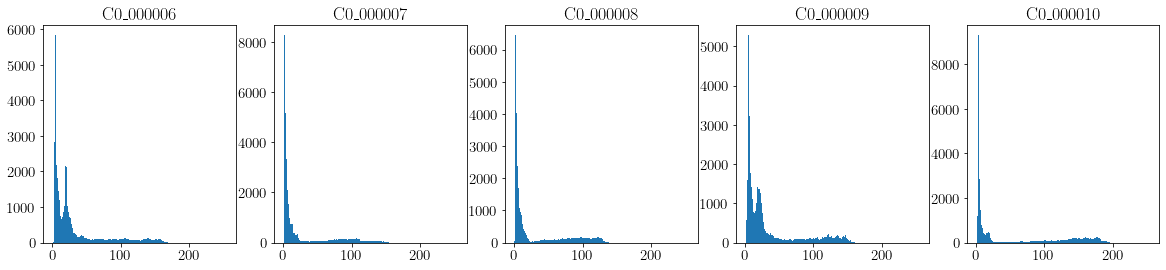

In [117]:
# List of the filtered gray-scale images.
f_gray_scale_images = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (20, 4))

# Filtering the images.
for i in range(N_images):
    
    # Appending the filtered image.
    f_gray_scale_images.append(cv2.GaussianBlur(gray_scale_images[i], (5, 5), 0))
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Adding the histogram of the smoothed image to the figure.
    ax[i].hist(f_gray_scale_images[i].flatten(), bins = range(256))

# Showing the figure.
plt.show()

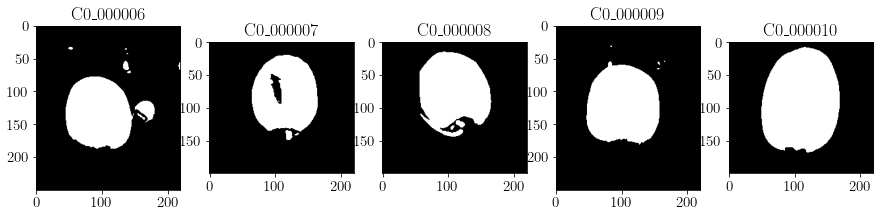

In [120]:
# List of masks.
fruit_masks = []

# Defining the figure object to be displayed.
fig, ax = plt.subplots(1, N_images, figsize = (15, 4))

# Thesholding the gray-scale images.
for i in range(N_images):
    
    # Applying Otsu's thresholding (https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html).
    threshold_value, binary_mask = cv2.threshold(f_gray_scale_images[i], 50, 255, cv2.THRESH_BINARY)
    
    # Appending the generated binary mask.
    fruit_masks.append(binary_mask)
    
    # Adding the specific title.
    ax[i].set_title(gray_scale_filenames[i])
    
    # Plotting the computed binary mask.
    ax[i].imshow(fruit_masks[i], cmap = "gray")

# Showing the figure.
plt.show()